<a href="https://colab.research.google.com/github/GiacomoDiFa/Progetto-MN/blob/main/Copia_di_FinalProject_2022_2023.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
%matplotlib inline
import numpy as np
from matplotlib.pyplot import *
import numpy.linalg
import scipy.linalg

Compile the following notebook and share a link with me sending and e-mail to giovanni.stabile@uniurb.it at least one week before the oral examination. All the implemented function will have to be properly documented and commented.

Compile The following Cell with your information. In case it is a group project, put the info for all the group members

Name1: Giacomo \
Surname1: Di Fabrizio\
Email1: 

Name2: Matteo Marco\
Surname2: Montanari\
Email2: 

Consider the following one-dimensional PDE:
$$
-u_{xx}(x) = f(x)\quad\mathrm{ in }\ \Omega = (0, \pi)
$$
$$
u(x) = 0, \quad\mathrm{ on }\ \partial\Omega = \{0, \pi\}
$$

Given the following $4^{th}$ order finite difference approximation of the second order derivative:

$$u_{xx}(x_i) = \frac{-u_{i-2}+16u_{i-1}-30u_i+16u_{i+1}-u_{i+2}}{12h^2}$$

Implement a function that given the domain interval, the forcing function, the number of discretization points, the boundary conditions, returns the matrix $A$ and the the right hand side $b$.

In [3]:
def finDif(omega,f,n,bc):
  x = np.linspace(0,np.pi,n)
  terminenoto = f(x)
  print(terminenoto)
  print("")
  h = 1./(n-1)
  m = n + 4 #numero di colonne matrice
  matrix = np.zeros((n, m))  # Inizializza una matrice di zeri
  # Assegna valori alla diagonale principale
  a = -1
  b = 16
  c = -30
  main_diagonal = np.full(min(n, m), a)
  np.fill_diagonal(matrix, main_diagonal)
  # Assegna valori alle altre diagonali sopra e sotto la diagonale principale
  np.fill_diagonal(matrix[:, 1:], b)
  np.fill_diagonal(matrix[:, 2:], c)
  np.fill_diagonal(matrix[:, 3:], b)
  np.fill_diagonal(matrix[:, 4:], a)
  #matrix /= 12*h**2
  print(matrix)
  print("")
  
  d = -2
  e = 1
  r = 2
  
  matrix1 = np.zeros((r,m))
  main_diagonal1 = np.full(min(r,m),d)
  np.fill_diagonal(matrix1,main_diagonal1)
  np.fill_diagonal(matrix1[:,1:],e)
  np.fill_diagonal(matrix1[-1:,:],e)
  #matrix1 /= h**2
  print(matrix1)
  print("")

  
  matrix2 = np.zeros((r,m))
  np.fill_diagonal(matrix2[:,-1:],e)
  np.fill_diagonal(matrix2[:,-2:],d)
  np.fill_diagonal(matrix2[:,-3:],e)
  #matrix2 /= h**2
  print(matrix2)
  print("")


 
  A = np.pad(matrix1, ((0, m-matrix1.shape[0]), (0, m-matrix1.shape[1])), mode='constant')
  B = np.pad(matrix2, ((m-matrix2.shape[0], 0), (0, m-matrix2.shape[1])), mode='constant')
  pad_rows = (m - matrix.shape[0]) // 2
  pad_cols = (m - matrix.shape[1]) // 2
  C = np.pad(matrix, (((pad_rows, m - matrix.shape[0] - pad_rows), (pad_cols, m - matrix.shape[1] - pad_cols))), mode='constant')
  D = A+B+C
  print(A)
  print("")
  print(B)
  print("")
  print(C)
  print("")
  print(D)
  print("")
  D[0,0] = 1
  D[-1,-1] = 1
  D[0,1] = 0
  D[-1,-2] = 0
  print("")
  print(D)
  print("")
  terminenoto[0] = bc[0]
  terminenoto[-1] = bc[1]
  print(terminenoto)
  print("")
  return D,terminenoto





omega = [0,np.pi]
f = lambda x : np.sin(x)
n=7
bc = [0,0]
finDif(omega, f, n, bc)
#unica cosa che non mi viene in mente adesso è che se io voglio 7 iterazioni (n) mi viene fuori matrice 11x11. 
#non dovrebbe essere 7x7?
#l'ho fatta venire 11 per 11 per come viene passato il parametro nella funzione, ma non so se come significato "fisico"
#abbia senso che io metto n=7 e torni una matrice 11x11
#la matrice finale è D
#no non torna anche perchè il termine noto b viene di 7 elementi giustamente
#potrei farlo tornare passandogli m nel linspace però non credo abbia senso a livello "fisico"
#ricordarsi di scommentare le divisioni una volta finito il codice 

[0.00000000e+00 5.00000000e-01 8.66025404e-01 1.00000000e+00
 8.66025404e-01 5.00000000e-01 1.22464680e-16]

[[ -1.  16. -30.  16.  -1.   0.   0.   0.   0.   0.   0.]
 [  0.  -1.  16. -30.  16.  -1.   0.   0.   0.   0.   0.]
 [  0.   0.  -1.  16. -30.  16.  -1.   0.   0.   0.   0.]
 [  0.   0.   0.  -1.  16. -30.  16.  -1.   0.   0.   0.]
 [  0.   0.   0.   0.  -1.  16. -30.  16.  -1.   0.   0.]
 [  0.   0.   0.   0.   0.  -1.  16. -30.  16.  -1.   0.]
 [  0.   0.   0.   0.   0.   0.  -1.  16. -30.  16.  -1.]]

[[-2.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 1. -2.  1.  0.  0.  0.  0.  0.  0.  0.  0.]]

[[ 0.  0.  0.  0.  0.  0.  0.  0.  1. -2.  1.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  1. -2.]]

[[-2.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 1. -2.  1.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.

(array([[  1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
        [  1.,  -2.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
        [ -1.,  16., -30.,  16.,  -1.,   0.,   0.,   0.,   0.,   0.,   0.],
        [  0.,  -1.,  16., -30.,  16.,  -1.,   0.,   0.,   0.,   0.,   0.],
        [  0.,   0.,  -1.,  16., -30.,  16.,  -1.,   0.,   0.,   0.,   0.],
        [  0.,   0.,   0.,  -1.,  16., -30.,  16.,  -1.,   0.,   0.,   0.],
        [  0.,   0.,   0.,   0.,  -1.,  16., -30.,  16.,  -1.,   0.,   0.],
        [  0.,   0.,   0.,   0.,   0.,  -1.,  16., -30.,  16.,  -1.,   0.],
        [  0.,   0.,   0.,   0.,   0.,   0.,  -1.,  16., -30.,  16.,  -1.],
        [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   1.,  -2.,   1.],
        [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   1.]]),
 array([0.       , 0.5      , 0.8660254, 1.       , 0.8660254, 0.5      ,
        0.       ]))

Call the function using:

In [8]:
omega = [0,np.pi]
f = lambda x : np.sin(x)
n=100
bc = [0,0]
A, b = finDif(omega, f, n, bc)
A1 = A.copy()
u = np.linalg.solve(A1, b) #qua non torna per la dimensione del termine noto come dicevo nello script sopra
x = np.linspace(0,1,n)
u_ex = (x**4)/12. - (x**3)/6. + x/12.

# Plot the FD and exact solution
_ = plot(x,u,'ro')
_ = plot(x,u_ex)

[0.00000000e+00 3.17279335e-02 6.34239197e-02 9.50560433e-02
 1.26592454e-01 1.58001396e-01 1.89251244e-01 2.20310533e-01
 2.51147987e-01 2.81732557e-01 3.12033446e-01 3.42020143e-01
 3.71662456e-01 4.00930535e-01 4.29794912e-01 4.58226522e-01
 4.86196736e-01 5.13677392e-01 5.40640817e-01 5.67059864e-01
 5.92907929e-01 6.18158986e-01 6.42787610e-01 6.66769001e-01
 6.90079011e-01 7.12694171e-01 7.34591709e-01 7.55749574e-01
 7.76146464e-01 7.95761841e-01 8.14575952e-01 8.32569855e-01
 8.49725430e-01 8.66025404e-01 8.81453363e-01 8.95993774e-01
 9.09631995e-01 9.22354294e-01 9.34147860e-01 9.45000819e-01
 9.54902241e-01 9.63842159e-01 9.71811568e-01 9.78802446e-01
 9.84807753e-01 9.89821442e-01 9.93838464e-01 9.96854776e-01
 9.98867339e-01 9.99874128e-01 9.99874128e-01 9.98867339e-01
 9.96854776e-01 9.93838464e-01 9.89821442e-01 9.84807753e-01
 9.78802446e-01 9.71811568e-01 9.63842159e-01 9.54902241e-01
 9.45000819e-01 9.34147860e-01 9.22354294e-01 9.09631995e-01
 8.95993774e-01 8.814533

ValueError: ignored

Implement two functions that compute the LU and the Cholesky factorization of the system matrix $A$

In [ ]:
def LU(A):
    A = A.copy()
    N=len(A)
    for k in range(N-1):
        if (abs(A[k,k]) < 1e-15):
            raise RuntimeError("Null pivot")
            
        A[k+1:N,k] /= A[k,k]
        for j in range(k+1,N):
            A[k+1:N,j] -= A[k+1:N,k]*A[k,j]
    
    L=tril(A)
    for i in range(N):
        L[i,i]=1.0
    U = triu(A)
    return L, U

L, U = LU(A)

In [ ]:
def cholesky(A):
    A = A.copy()
    N = len(A)
    for k in range(N-1):
        A[k,k] = sqrt(A[k,k])
        A[k+1:N,k] = A[k+1:N,k]/A[k,k]
        
        for j in range(k+1,N):
            A[j:N,j] = A[j:N,j] - A[j:N,k]*A[j,k]
        
    A[-1,-1] = sqrt(A[-1,-1])
    L=tril(A)
    return L, L.transpose()

HT, H = cholesky(A)

<ipython-input-67-b6f2d174eaa2>:5: RuntimeWarning: invalid value encountered in sqrt
  A[k,k] = sqrt(A[k,k])


Implement forward and backward substitution functions to exploit the developed factorization methods to solve the derived linear system of equations.

In [ ]:
def L_solve(L,rhs):
  x = zeros_like(rhs)
  N = len(L)
        
  x[0] = rhs[0]/L[0,0]
  for i in range(1,N):
    x[i] = (rhs[i] - dot(L[i, 0:i], x[0:i]))/L[i,i]
  return x

In [ ]:
def U_solve(U,rhs):
  x = zeros_like(rhs)
  N=len(U)
              
  x[-1] = rhs[-1]/U[-1,-1]
  for i in reversed(range(N-1)):
    x[i] = (rhs[i] -dot(U[i, i+1:N], x[i+1:N]))/U[i,i]
  return x

Solve the derived linear system using the implemented functions and plot the computed solution:

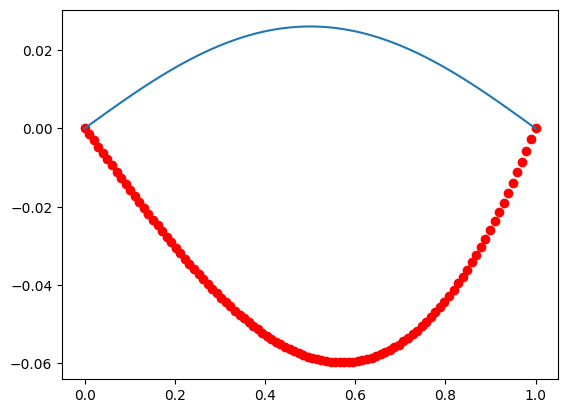

In [ ]:
w = L_solve(L,b)
u = U_solve(U,w)
x = linspace(0,1,n)
u_ex = (x**4)/12. - (x**3)/6. + x/12.
_ = plot(x,u,'ro')
_ = plot(x,u_ex)

Considering the new domain $\Omega = (0,1)$ and the forcing term $f(x) = x(1-x)$ with B.C. $u(x) = 0$, on $\partial \Omega = {0,1}$ produce a plot and a table where you show the decay of the error w.r.t. the number of grid points.
(The analytical solution for the above problems is $u_{an} = \frac{x^4}{12} - \frac{x^3}{6} + \frac{x}{12}$)

In [ ]:
#TODO

Exploit the derived LU factorizations to compute the determinant of the system's matrix $A$ using the original problem formulation.

In [ ]:
def condNumb(A):
    pass #TODO
    return condNu

Implement a preconditioned Conjugant Gradient method to solve the original linear system of equations using an iterative method:

In [ ]:
def conjugate_gradient(A, b, P, nmax=len(A), eps=1e-10):
  N=len(A)
  x = zeros_like(b)
  tol = eps + 1
  it = 0
  r = b - dot(A,x)
  rho_old = 1.
  p_old = zeros_like(b)
  while (it < nmax and tol > eps):
    it += 1
    z = linalg.solve(P,r)
    rho = dot(r,z)
    if (it > 1):
      beta = rho/rho_old
      p = z + beta*p_old
    else:
      p = z
      q = dot(A,p)
      alpha = rho/(dot(p,q))
      x += p*alpha
      r -= q*alpha
      p_old = p
      rho_old = rho
      tol = linalg.norm(r,2)
      
  print(it, tol)
  return x

sol_conjugate_gradient = conjugate_gradient(A, b, identity(len(A)))
print(linalg.norm(sol_conjugate_gradient - u)/linalg.norm(u))

100 33.70238151242315
0.9657720922374371


Consider the following time dependent variation of the PDE starting from the orginal problem formulation:
$$
u'(t)-u_{xx} = \alpha(t)f(x)
$$

for $t\in [0,T]$, with $\alpha(t) = \cos(t)$ and $T = 6\pi$

Use the same finite difference scheme to derive the semi-discrete formulation and solve it using a forward Euler's method.

Plot the time dependent solution solution at $x = \pi/2$, $x=1$, 
$x=\pi$


In [ ]:
#TODO

Given the original $Au = b$ system, implement an algorithm to compute the largest and smallest eigenvalues and the associated eigenvectors of the matrix $A$.

In [ ]:
z0 = ones_like(x)
def PM(A,z0,tol=1e-5,nmax=500):
    q = z0/linalg.norm(z0,2)
    it = 0
    err = tol + 1.
    while it < nmax and err > tol:
        z = dot(A,q)
        l = dot(q.T,z)
        err = linalg.norm(z-l*q,2)
        q = z/linalg.norm(z,2)
        
        it += 1
    print("error =", err, "iterations =", it)
    print("lambda_max =", l)
    return l,q

l,x = PM(A,z0)
    
l_np, x_np = linalg.eig(A)

print("numpy")
print(l_np)

def IPM(A,x0,mu,tol=1e-5,nmax=500):
    M = A -mu*eye(len(A))
    P,L,U = scipy.linalg.lu(M)
    err = tol + 1.
    it = 0
    q = x0/numpy.linalg.norm(x0,2)
    while it < nmax and err > tol :
        y = scipy.linalg.solve(L,dot(P.T,q))
        x = scipy.linalg.solve(U,y)
        q = x/numpy.linalg.norm(x,2)
        z = dot(A,q)
        l = dot(q.T,z)
        err = numpy.linalg.norm(z-l*q,2)
        it += 1
    print("error =", err, "iterations =", it)
    print("lambda =", l)
    return l,q

l,x = IPM(A,z0,6.)

error = 55.651170394032256 iterations = 500
lambda_max = -52189.47099903501
numpy
[-5.22555879e+04 -5.22063779e+04 -5.21244489e+04 -5.20099324e+04
 -5.18630119e+04 -5.16839223e+04 -5.14729499e+04 -5.12304312e+04
 -5.09567522e+04 -5.06523472e+04 -5.03176984e+04 -4.99533340e+04
 -4.95598271e+04 -4.91377946e+04 -4.86878952e+04 -4.82108282e+04
 -4.77073316e+04 -4.71781804e+04 -4.66241848e+04 -4.60461879e+04
 -4.54450644e+04 -4.48217177e+04 -4.41770785e+04 -4.35121023e+04
 -4.28277673e+04 -4.21250720e+04 -4.14050333e+04 -4.06686839e+04
 -3.99170701e+04 -3.91512497e+04 -3.83722895e+04 -3.75812631e+04
 -3.67792489e+04 -3.59673273e+04 -3.51465792e+04 -3.43180834e+04
 -3.34829145e+04 -3.26421413e+04 -3.17968241e+04 -3.09480135e+04
 -3.00967480e+04 -2.92440523e+04 -2.83909360e+04 -2.75383914e+04
 -2.66873925e+04 -2.58388930e+04 -2.49938255e+04 -2.41530998e+04
 -2.33176021e+04 -2.24881936e+04 -2.16657098e+04 -2.08509597e+04
 -2.00447247e+04 -1.92477584e+04 -1.84607860e+04 -1.76845034e+04
 -1.6919

Compute the inverse of the matrix A exploiting the derived LU factorization

In [ ]:
#TODO

Consider the following Cauchy problem
$$
\begin{cases}
y'= -ty^2 \quad 0\le t \le 2\\
y(0) = 1
\end{cases}
$$
Implement a Backward Euler's method in a suitable function and solve the resulting non-linear equation using a Newton's method.

In [ ]:
#TODO